In [168]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans



# Test Model & Predictions

### Clustering

In [169]:
# Import datas
data = pd.read_csv('../data_cleaning/BankChurners.csv')

# Save Attrition columns for Probability estimation
attrition_flag = data['Attrition_Flag']

# Drop unwanted columns
data = data.drop(['Attrition_Flag','CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

# Clean datas
data = data.replace({
    'Unknown': np.nan
})

# Save columns name
columns_names = data.columns

# Select one row for testing the model
X_form = data.iloc[[42]]


In [170]:
data.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<p>Import model</p>

In [171]:
clustering_model = pickle.load(open('./model/test_models/cluster.pkl', 'rb'))
clustering_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_C...
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object'))])),
                ('model', KMeans(init='random', n_clusters=6, n_init='auto'))])

<p>Prediction</p>

In [192]:
prediction = clustering_model.predict(X_form)
print(f"This client belongs to cluster {prediction[0]}.")

This client belongs to cluster 0.


<p>Explore model</p>

In [173]:
k_labels = clustering_model['model'].labels_
k_labels_s = pd.Series(k_labels, name = 'cluster')
k_centroids = clustering_model['model'].cluster_centers_

# tranform the data through the pipeline preprocessing: returns a df 👌
data_cleaned = clustering_model.named_steps['preprocessing'].transform(data)
# Add labels from the model
data_clustered = pd.concat([data_cleaned, k_labels_s], axis=1)
# Add classification (churning) from raw dataset
data_clustered_classified = pd.concat([data_clustered, attrition_flag], axis=1)
data_clustered_classified.head()



,numeric__Customer_Age,numeric__Dependent_count,numeric__Months_on_book,numeric__Total_Relationship_Count,numeric__Months_Inactive_12_mon,numeric__Contacts_Count_12_mon,numeric__Credit_Limit,numeric__Total_Revolving_Bal,numeric__Avg_Open_To_Buy,numeric__Total_Amt_Chng_Q4_Q1,...,categorical__Income_Category_$40K - $60K,categorical__Income_Category_$60K - $80K,categorical__Income_Category_$80K - $120K,categorical__Income_Category_Less than $40K,categorical__Card_Category_Blue,categorical__Card_Category_Gold,categorical__Card_Category_Platinum,categorical__Card_Category_Silver,cluster,Attrition_Flag
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,Existing Customer
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,Existing Customer
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,Existing Customer
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,Existing Customer
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,Existing Customer


## Centroids Analysis

In [174]:
centroids = pd.DataFrame(k_centroids, columns = data_cleaned.columns)
centroids.head()

,numeric__Customer_Age,numeric__Dependent_count,numeric__Months_on_book,numeric__Total_Relationship_Count,numeric__Months_Inactive_12_mon,numeric__Contacts_Count_12_mon,numeric__Credit_Limit,numeric__Total_Revolving_Bal,numeric__Avg_Open_To_Buy,numeric__Total_Amt_Chng_Q4_Q1,...,categorical__Marital_Status_Single,categorical__Income_Category_$120K +,categorical__Income_Category_$40K - $60K,categorical__Income_Category_$60K - $80K,categorical__Income_Category_$80K - $120K,categorical__Income_Category_Less than $40K,categorical__Card_Category_Blue,categorical__Card_Category_Gold,categorical__Card_Category_Platinum,categorical__Card_Category_Silver
0,1.272741,-0.876987,1.162733,0.346038,0.046328,0.128646,-0.339801,0.301930,-0.366798,0.004111,...,0.354193,0.056946,0.207134,0.140175,0.130163,0.465582,0.981227,0.000626,-8.673617e-19,0.018148
1,-0.024998,0.469866,-0.038518,-0.061792,-0.001327,-0.255389,-0.573563,0.628252,-0.629766,-0.126747,...,0.387484,0.019478,0.196850,0.069623,0.057605,0.656444,0.995441,0.000414,9.540979e-18,0.004144
2,-0.129727,-0.023035,-0.104229,-1.039893,-0.119652,-0.252139,0.548582,0.295968,0.521933,0.067836,...,0.399791,0.081420,0.192067,0.179541,0.191023,0.355950,0.796451,0.037578,8.350731e-03,0.157620
3,-0.029877,0.290569,-0.008366,-0.028630,0.161284,0.115917,-0.320396,-1.094692,-0.222188,-0.291637,...,0.391937,0.044888,0.187864,0.145885,0.113466,0.507897,0.974231,0.003325,8.312552e-04,0.021613
4,0.050158,0.200068,0.046229,0.038097,-0.027743,0.061115,2.038123,0.017640,2.036114,-0.029807,...,0.414141,0.264180,0.032634,0.194250,0.421911,0.087024,0.717172,0.051282,7.770008e-03,0.223776


In [178]:

def UnscaleCentroids(centroids: pd.DataFrame, original_df: pd.DataFrame) -> pd.DataFrame:

    # Select numerical and categorical columns
    centroids_numerical = centroids.loc[:, centroids.columns.str.startswith('numeric__')]
    centroids_categorical = centroids.loc[:, centroids.columns.str.startswith('categorical__')]
    # Save columns names
    numerical_columns = original_df.select_dtypes(include=['number']).columns 
    categorical_columns = original_df.select_dtypes(exclude=['number']).columns
    # Inverse numerical and categorical
    numerical_inverse = clustering_model.steps[0][1].named_transformers_['numeric']['scaler'].inverse_transform(centroids_numerical)
    categorical_inverse = clustering_model.steps[0][1].named_transformers_['categorical']['encoder'].inverse_transform(centroids_categorical)
    # Build df for num and cat, with original column names
    numerical_inverse = pd.DataFrame(numerical_inverse, columns = numerical_columns)
    categorical_inverse = pd.DataFrame(categorical_inverse, columns = categorical_columns)
    # Concat to centroids_inverse df
    centroids_inverse = pd.concat([numerical_inverse, categorical_inverse], axis=1)
    return centroids_inverse


centroids_inverse = UnscaleCentroids(centroids, data)



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,56.528786,1.207134,45.214018,4.350438,2.387985,2.597622,5543.728786,1408.871089,4134.857697,0.760842,2849.543805,52.627660,0.702071,0.358340,F,Graduate,Married,Less than $40K,Blue
1,46.125570,2.956486,35.620804,3.716535,2.339826,2.172814,3419.222710,1674.806051,1744.416660,0.732158,4156.761707,70.470369,0.739441,0.571757,F,Graduate,Married,Less than $40K,Blue
2,45.286013,2.316284,35.096033,2.196242,2.220251,2.176409,13617.644050,1404.012526,12213.631524,0.774810,13235.079332,106.224426,0.732351,0.174919,M,Graduate,Married,Less than $40K,Blue
3,46.086451,2.723608,35.861596,3.768080,2.504156,2.583541,5720.092810,270.697839,5449.394971,0.696015,3415.415628,58.989609,0.640145,0.044448,F,Graduate,Married,Less than $40K,Blue
4,46.728050,2.606061,36.297591,3.871795,2.313131,2.522922,27155.086247,1177.189588,25977.896659,0.753407,3711.618493,60.175602,0.701610,0.046775,M,Graduate,Married,$80K - $120K,Blue
5,36.247099,1.754949,26.636177,4.462116,2.128328,2.677816,5835.829215,1345.903754,4489.925461,0.905721,2964.365870,55.660068,0.792998,0.339152,M,Graduate,Married,Less than $40K,Blue


In [181]:
columns_order = ['Total_Amt_Chng_Q4_Q1','Dependent_count','Total_Relationship_Count','Total_Ct_Chng_Q4_Q1','Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

def sortCentroids(df: pd.DataFrame, order: list) -> pd.DataFrame:
    return df[order]

centroids_profile = sortCentroids(centroids_inverse, columns_order)
centroids_profile

,Total_Amt_Chng_Q4_Q1,Dependent_count,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Contacts_Count_12_mon,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.760842,1.207134,4.350438,0.702071,2.597622,2.387985,1408.871089,2849.543805,52.627660,0.358340
1,0.732158,2.956486,3.716535,0.739441,2.172814,2.339826,1674.806051,4156.761707,70.470369,0.571757
2,0.774810,2.316284,2.196242,0.732351,2.176409,2.220251,1404.012526,13235.079332,106.224426,0.174919
3,0.696015,2.723608,3.768080,0.640145,2.583541,2.504156,270.697839,3415.415628,58.989609,0.044448
4,0.753407,2.606061,3.871795,0.701610,2.522922,2.313131,1177.189588,3711.618493,60.175602,0.046775
5,0.905721,1.754949,4.462116,0.792998,2.677816,2.128328,1345.903754,2964.365870,55.660068,0.339152


In [ ]:
probability = data_clustered_classified.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2)
# probability.unstack(level=-1).plot.barh()
probability.astype(str) + '%'

# sns.histplot(probability, x='cluster', hue='Attrition_Flag', multiple='fill')
# probability.head()

cluster  Attrition_Flag   
0        Existing Customer    90.83%
         Attrited Customer     9.17%
1        Existing Customer    98.54%
         Attrited Customer     1.46%
2        Existing Customer    91.36%
         Attrited Customer     8.64%
3        Existing Customer    64.31%
         Attrited Customer    35.69%
4        Existing Customer    86.79%
         Attrited Customer    13.21%
5        Existing Customer    84.17%
         Attrited Customer    15.83%
Name: Attrition_Flag, dtype: object

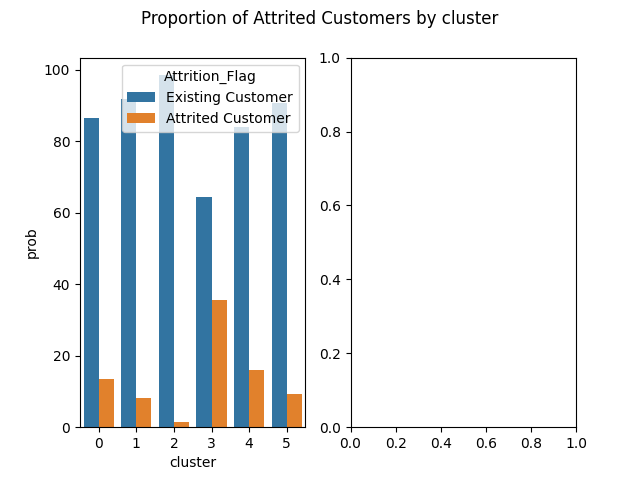

In [185]:
f, axes = plt.subplots(1,2)
proba_df = (data_clustered_classified.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2).rename('prob').reset_index())
proba_df
sns.barplot(x='cluster',y='prob', hue='Attrition_Flag', data=proba_df, ax=axes[0])
# sns.barplot(x='cluster',y='prob', hue='Attrition_Flag', stat="proba", multiple="fill", data=proba_df, ax=axes[1])
f.suptitle('Proportion of Attrited Customers by cluster')
plt.show()
plt.close()

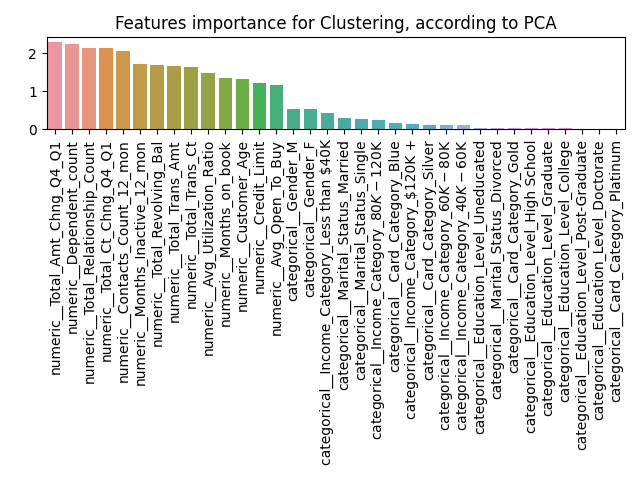

['numeric__Total_Amt_Chng_Q4_Q1', 'numeric__Dependent_count', 'numeric__Total_Relationship_Count', 'numeric__Total_Ct_Chng_Q4_Q1', 'numeric__Contacts_Count_12_mon', 'numeric__Months_Inactive_12_mon', 'numeric__Total_Revolving_Bal', 'numeric__Total_Trans_Amt', 'numeric__Total_Trans_Ct', 'numeric__Avg_Utilization_Ratio', 'numeric__Months_on_book', 'numeric__Customer_Age', 'numeric__Credit_Limit', 'numeric__Avg_Open_To_Buy', 'categorical__Gender_M', 'categorical__Gender_F', 'categorical__Income_Category_Less than $40K', 'categorical__Marital_Status_Married', 'categorical__Marital_Status_Single', 'categorical__Income_Category_$80K - $120K', 'categorical__Card_Category_Blue', 'categorical__Income_Category_$120K +', 'categorical__Card_Category_Silver', 'categorical__Income_Category_$60K - $80K', 'categorical__Income_Category_$40K - $60K', 'categorical__Education_Level_Uneducated', 'categorical__Marital_Status_Divorced', 'categorical__Card_Category_Gold', 'categorical__Education_Level_High Sc

In [179]:
# PCA Analysis: sort features by importance, used to compile pca components.

pca = PCA(n_components=10)
pca.fit_transform(data_cleaned)
pca_df = pd.DataFrame(pca.components_, columns=data_cleaned.columns)
pca_df = abs(pca_df)
pca_df = pd.DataFrame(pca_df.sum(axis=0).values.reshape(1, -1), columns=data_cleaned.columns)

# create a list of tuples containing the column names and their corresponding values in the first row
cols_and_vals = [(col, pca_df.iloc[0][col]) for col in pca_df.columns]

# sort the list of tuples based on the values in the first row
cols_sorted = sorted(cols_and_vals, key=lambda x: x[1], reverse=True)

# create a list of the sorted column names
cols_sorted_names = [x[0] for x in cols_sorted]

# reorder the dataframe based on the sorted column names
pca_sorted_df = abs(pca_df[cols_sorted_names])
sns.barplot(data = pca_sorted_df)
plt.title('Features importance for Clustering, according to PCA')
plt.xticks(rotation=90)
plt.tight_layout(w_pad=2)
plt.show()
plt.close()
# print(pca_sorted_df)

print(cols_sorted_names)

c:\Users\meule\OneDrive\Documents\BeCodeAI\GitHub\Churn_Prediction_Becode\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


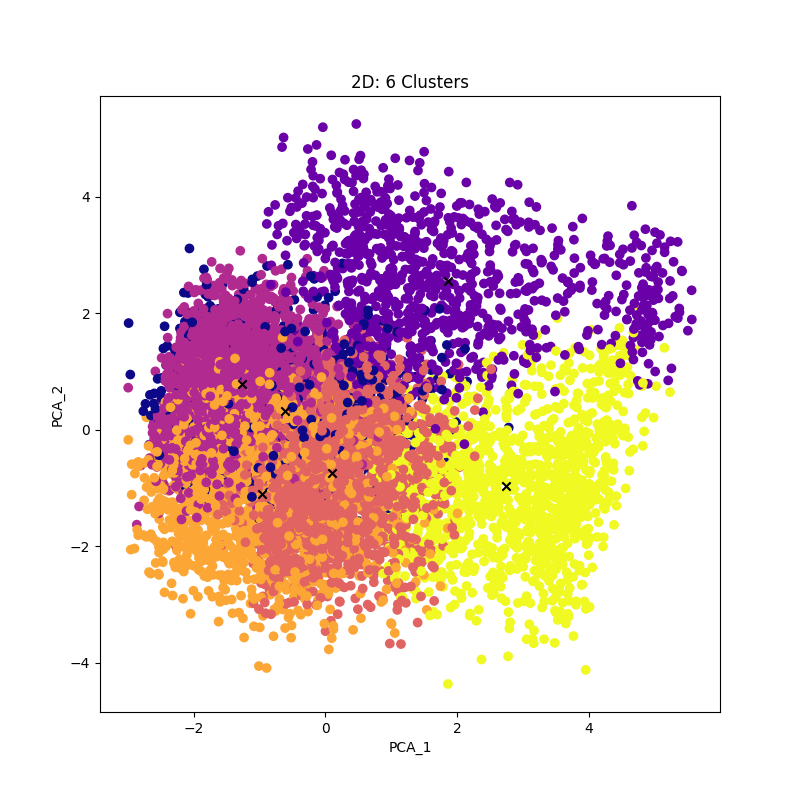

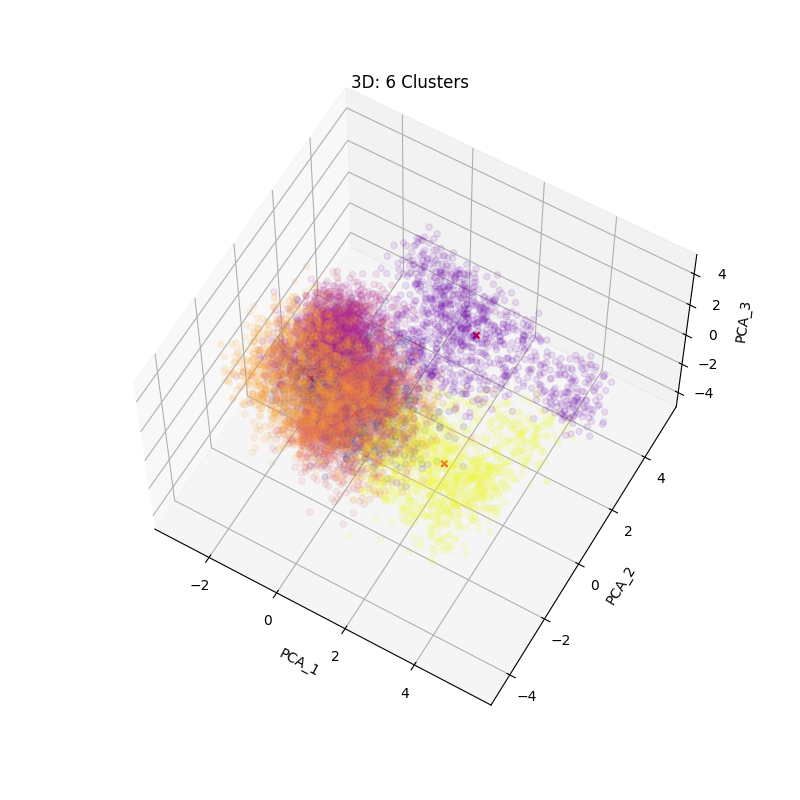

In [ ]:
%matplotlib widget
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d    

def plot_clusters(data, labels, centroids):
    pca = PCA(n_components=3)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids) # do not use fit to avoid fitting again and having centroids offsets
    
    # 2D scatter plot with PCA_1 and PCA_2
    fig0 = plt.figure(figsize=(8, 8))
    ax0 = plt.axes()
    ax0.set_title(f"2D: {len(centroids)} Clusters")
    ax0.set_xlabel('PCA_1')
    ax0.set_ylabel('PCA_2')
    ax0.scatter(x=data_2d[:,0], y= data_2d[:,1], c=labels, cmap='plasma')
    ax0.scatter(x=centroids_2d[:,0], y= centroids_2d[:,1], marker='x', c="black")
    plt.show()
    plt.close()
    
    # 3D scatter plot with PCA_1, PCA_2 and PCA_3
    fig = plt.figure(figsize=[8,8])
    fig.canvas.toolbar.visible = True
    ax = plt.axes(projection='3d')
    ax.set_title(f"3D: {len(centroids)} Clusters")
    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')
    # datas
    xdata = data_2d[:,0]
    ydata = data_2d[:,1]
    zdata = data_2d[:,2]
    # centoids
    xctr = centroids_2d[:,0]
    yctr = centroids_2d[:,1]
    zctr = centroids_2d[:,2]
    # Plot datasets
    ax.scatter3D(xdata, ydata, zdata, c=labels, alpha=0.1, cmap='plasma')
    # Plots centroids
    ax.scatter3D(xctr, yctr, zctr, c='red', alpha=1, marker='x')
    # Set Default view
    ax.elev = 60
    # ax.dist = 
    # ax.azim = 
    plt.show()
    plt.close()


# kmeans.labels_
plot_clusters(data_cleaned, k_labels_s, k_centroids)

### Classification